In [13]:
from scipy import stats
from scipy import optimize
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [14]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)
np.median(x)
x.min(), x.max()
x.var()
x.std()
x.var(ddof=1)
x.std(ddof=1)

1.8731181032095732

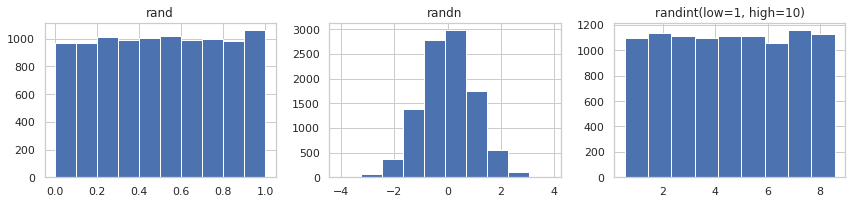

In [15]:
random.seed(123456789)
random.random()
random.randint(0, 10)  # 0 and 10 inclusive
np.random.seed(123456789)
np.random.rand()
np.random.randn()
np.random.rand(5)
np.random.randn(2, 4)
np.random.randint(10, size=10)
np.random.randint(low=10, high=20, size=(2, 10))
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()
fig.savefig("ch13-random-hist.pdf")

In [16]:
np.random.choice(10, 5, replace=False)
np.random.seed(123456789)
np.random.rand()
np.random.seed(123456789); np.random.rand()
np.random.seed(123456789); np.random.rand()
prng = np.random.RandomState(123456789)
prng.rand(2, 4)
prng.chisquare(1, size=(2, 2))
prng.standard_t(1, size=(2, 3))
prng.f(5, 2, size=(2, 4))
prng.binomial(10, 0.5, size=10)
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

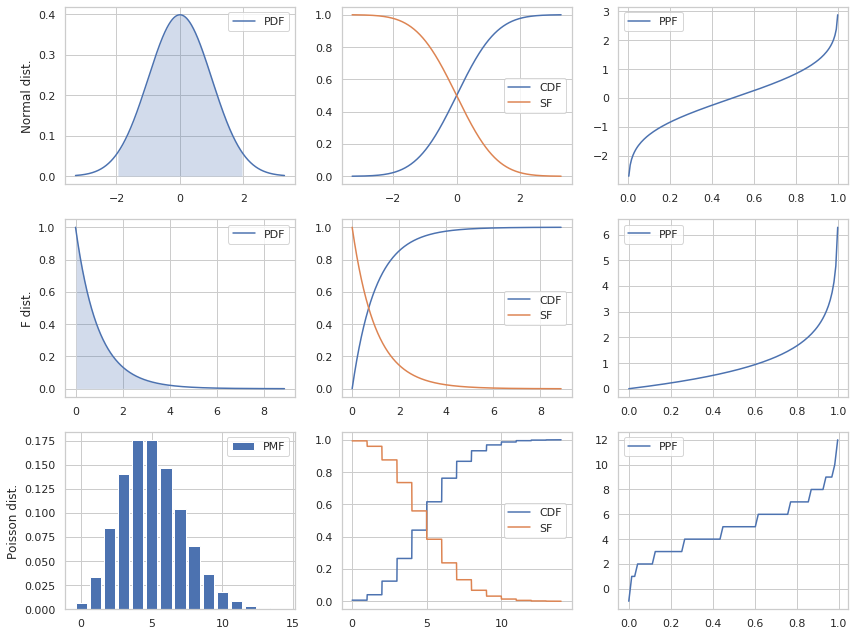

In [17]:
np.random.seed(123456789)
X = stats.norm(1, 0.5)
X.mean()
X.median()
X.std()
X.var()
[X.moment(n) for n in range(5)]
X.stats()
X.pdf([0, 1, 2])
X.cdf([0, 1, 2])
X.rvs(10)
stats.norm(1, 0.5).stats()
stats.norm.stats(loc=2, scale=0.5)
X.interval(0.95)
X.interval(0.99)
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()
fig.savefig("ch13-distributions.pdf")



/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


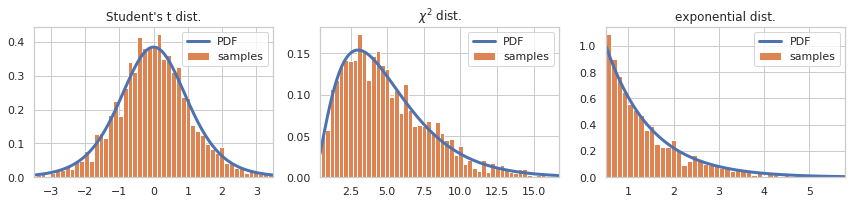

In [18]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()
fig.savefig("ch13-dist-sample.pdf")

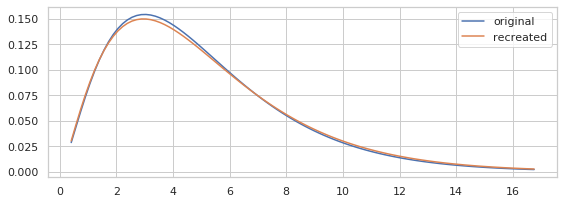

In [19]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale
Y = stats.chi2(df=df, loc=loc, scale=scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax.plot(x, X.pdf(x), label="original")
ax.plot(x, Y.pdf(x), label="recreated")
ax.legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

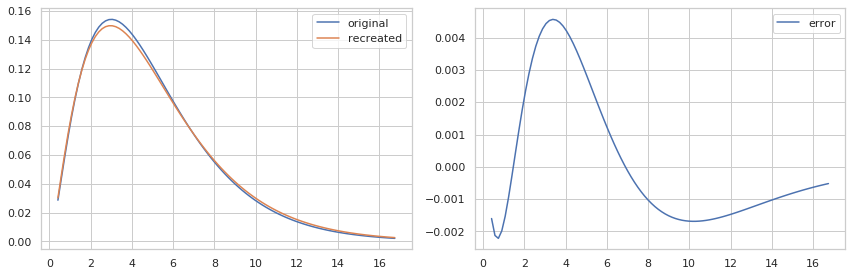

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

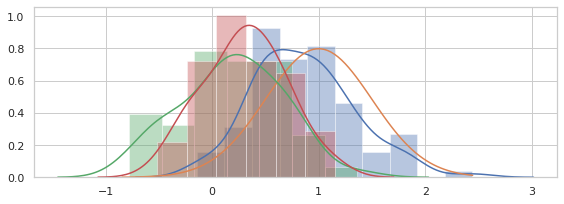

In [21]:
np.random.seed(123456789)
mu, sigma = 1.0, 0.5
X = stats.norm(mu-0.2, sigma)
n = 100
X_samples = X.rvs(n)
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n))
t = (X_samples.mean() - mu)/(X_samples.std(ddof=1)/np.sqrt(n))
stats.norm().ppf(0.025)
2 * stats.norm().cdf(-abs(z))
2 * stats.t(df=(n-1)).cdf(-abs(t))
t, p = stats.ttest_1samp(X_samples, mu)
t
p
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()
fig.savefig("ch13-hypothesis-test-dist-sample-mean.pdf")

n = 50
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)
t, p = stats.ttest_ind(X1_sample, X2_sample)
t
p
mu1, mu2
sns.distplot(X1_sample)
sns.distplot(X2_sample)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


array([ 1.14547623, 11.07049769])

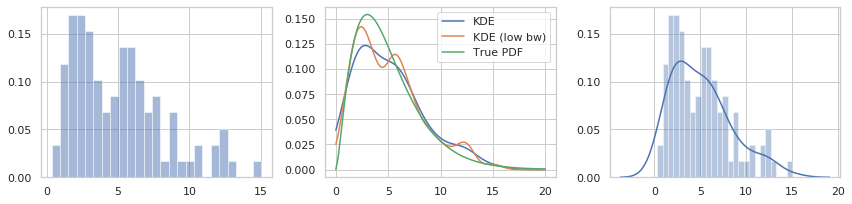

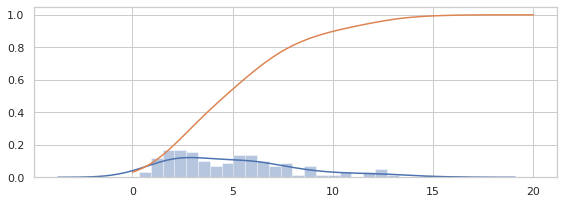

In [22]:
np.random.seed(0)
X = stats.chi2(df=5)
X_samples = X.rvs(100)
kde = stats.kde.gaussian_kde(X_samples)
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()
fig.savefig("ch13-hist-kde.pdf")
kde.resample(10)
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.distplot(X_samples, bins=25, ax=ax)
x = np.linspace(0, 20, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]
kde_ppf = np.vectorize(_kde_ppf)
kde_ppf([0.05, 0.95])
X.ppf([0.05, 0.95])

In [ ]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib, seaborn
lines = """alpha             -- Alpha
       anglit            -- Anglit
       arcsine           -- Arcsine
       argus             -- Argus
       beta              -- Beta
       betaprime         -- Beta Prime
       bradford          -- Bradford
       burr              -- Burr (Type III)
       burr12            -- Burr (Type XII)
       cauchy            -- Cauchy
       chi               -- Chi
       chi2              -- Chi-squared
       cosine            -- Cosine
       crystalball       -- Crystalball
       dgamma            -- Double Gamma
       dweibull          -- Double Weibull
       erlang            -- Erlang
       expon             -- Exponential
       exponnorm         -- Exponentially Modified Normal
       exponweib         -- Exponentiated Weibull
       exponpow          -- Exponential Power
       f                 -- F (Snecdor F)
       fatiguelife       -- Fatigue Life (Birnbaum-Saunders)
       fisk              -- Fisk
       foldcauchy        -- Folded Cauchy
       foldnorm          -- Folded Normal
       frechet_r         -- Deprecated. Alias for weibull_min
       frechet_l         -- Deprecated. Alias for weibull_max
       genlogistic       -- Generalized Logistic
       gennorm           -- Generalized normal
       genpareto         -- Generalized Pareto
       genexpon          -- Generalized Exponential
       genextreme        -- Generalized Extreme Value
       gausshyper        -- Gauss Hypergeometric
       gamma             -- Gamma
       gengamma          -- Generalized gamma
       genhalflogistic   -- Generalized Half Logistic
       gilbrat           -- Gilbrat
       gompertz          -- Gompertz (Truncated Gumbel)
       gumbel_r          -- Right Sided Gumbel, Log-Weibull, Fisher-Tippett, Extreme Value Type I
       gumbel_l          -- Left Sided Gumbel, etc.
       halfcauchy        -- Half Cauchy
       halflogistic      -- Half Logistic
       halfnorm          -- Half Normal
       halfgennorm       -- Generalized Half Normal
       hypsecant         -- Hyperbolic Secant
       invgamma          -- Inverse Gamma
       invgauss          -- Inverse Gaussian
       invweibull        -- Inverse Weibull
       johnsonsb         -- Johnson SB
       johnsonsu         -- Johnson SU
       kappa4            -- Kappa 4 parameter
       kappa3            -- Kappa 3 parameter
       ksone             -- Kolmogorov-Smirnov one-sided (no stats)
       kstwobign         -- Kolmogorov-Smirnov two-sided test for Large N (no stats)
       laplace           -- Laplace
       levy              -- Levy
       levy_l
       levy_stable
       logistic          -- Logistic
       loggamma          -- Log-Gamma
       loglaplace        -- Log-Laplace (Log Double Exponential)
       lognorm           -- Log-Normal
       lomax             -- Lomax (Pareto of the second kind)
       maxwell           -- Maxwell
       mielke            -- Mielke's Beta-Kappa
       moyal             -- Moyal
       nakagami          -- Nakagami
       ncx2              -- Non-central chi-squared
       ncf               -- Non-central F
       nct               -- Non-central Student's T
       norm              -- Normal (Gaussian)
       norminvgauss      -- Normal Inverse Gaussian
       pareto            -- Pareto
       pearson3          -- Pearson type III
       powerlaw          -- Power-function
       powerlognorm      -- Power log normal
       powernorm         -- Power normal
       rdist             -- R-distribution
       reciprocal        -- Reciprocal
       rayleigh          -- Rayleigh
       rice              -- Rice
       recipinvgauss     -- Reciprocal Inverse Gaussian
       semicircular      -- Semicircular
       skewnorm          -- Skew normal
       t                 -- Student's T
       trapz              -- Trapezoidal
       triang            -- Triangular
       truncexpon        -- Truncated Exponential
       truncnorm         -- Truncated Normal
       tukeylambda       -- Tukey-Lambda
       uniform           -- Uniform
       vonmises          -- Von-Mises (Circular)
       vonmises_line     -- Von-Mises (Line)
       wald              -- Wald
       weibull_min       -- Minimum Weibull (see Frechet)
       weibull_max       -- Maximum Weibull (see Frechet)
       wrapcauchy        -- Wrapped Cauchy"""
len(lines.split("\n"))
help(stats)